## EDA - Dataset 07 - emergency_-_911_calls

### 1. Packages & Settings


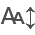

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Advanced analysis
from scipy import stats
from ydata_profiling import ProfileReport

# Interactive tables
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

# Configuration
pd.set_option('display.max_columns', 30)
sns.set_theme(style='whitegrid')
%config InlineBackend.figure_format = 'retina'
np.random.seed(42)  # Reproducibility

### 2. Importing Data

In [2]:
# Data Loading
filepath = os.path.abspath(os.path.join(globals()['_dh'][0], '..', '..', '0_Data/07_emergency_-_911_calls/0_Raw/911.csv'))
df = pd.read_csv(f"{filepath}")

### 3.1 First Look

In [3]:
# Sample data
show(df.sample(5))  # Random rows to avoid bias

# Summary of the DataFrame
df.info()

# Basic Statistics of the DataFrame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


lat            lng            zip         e
count  663522.000000  663522.000000  583323.000000  663522.0
mean       40.158162     -75.300105   19236.055791       1.0
std         0.220641       1.672884     298.222637       0.0
min         0.000000    -119.698206    1104.000000       1.0
25%        40.100344     -75.392735   19038.000000       1.0
50%        40.143927     -75.305143   19401.000000       1.0
75%        40.229008     -75.211865   19446.000000       1.0
max        51.335390      87.854975   77316.000000       1.0

### 3.2 Results of First Look:
##### Observations:
- large sized dataframe (663522 x 9)
- There are some missing values: zip, twp
- Data types look good, except e=boolean?, what is twp?
##### Potential Problems:
- column e = emergency boolean?
- data in "desc" kind of duplicate, don't need timestamp in text if timestamp is always filled out.
- data in desc duplication: twp = location in desc.
- ==> this is probably where the missing values in those two categories come from. **Investigate**

### 4.1 Automated Analysis with ydata_profiling

In [ ]:
# profile = ProfileReport(df, title="Automated EDA", explorative=True)
# profile.to_notebook_iframe()
# Save to HTML for later review (optional)
# profile.to_file("1b_automated_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.2 Automated EDA Results
##### Observations
- Not many numbers to use automated correlation on. Should correlate regions to type of emergency.
- column "e" can be removed, since everything is deemed an emergency.

##### Hypotheses:
- *None*

### 5. Necessary Cleaning & Transformation Steps for Python Scripts
##### Cleaning:
- Remove column "e"
- Clean "desc" column from twp and timeframe.
##### Transformation:
- Investigate for correlations per region/neighbourhood.
- Investigate for correlations per date/time.

### 6. Hypothesis-Driven Analysis

In [5]:
# Check hypotheses in 4.2

### 7. Focused Investigation
*When to use*:  
- Drill into subgroups (e.g., "Why do users aged 30-40 have higher churn?")  
- Export specific slices for stakeholder reviews  
*Industry Standard*: Never explore blindly – start with hypotheses from Sections 4-5.

In [6]:
# Check how hyptheses from 3-5 can be explained by the data
"""
show(
    df.query("Income > 70000"),
    column_filters="footer",
    buttons=["copy", "csv"],
    scrollY="300px",
    classes="compact"
)
"""

'\nshow(\n    df.query("Income > 70000"),\n    column_filters="footer",\n    buttons=["copy", "csv"],\n    scrollY="300px",\n    classes="compact"\n)\n'